In [ ]:
from pylab import *
import numpy as np
import sys
import pandas as pd
import cv2
import os
import copy
from scipy.stats import rice
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil

import os
from glob import glob
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Paths to data folders
base_dir = '/content/drive/MyDrive/FinalMLProject'


data_dir = base_dir + "/data"
print(data_dir)
print(os.listdir(data_dir))

split_data_dir  = base_dir + "/split_data"
print(split_data_dir)
print(os.listdir(split_data_dir))

train_dir = split_data_dir + "/train"
print("Training Directory: " + train_dir)

test_dir = split_data_dir + "/test"
print("Test Directory: " + test_dir)


/content/drive/MyDrive/FinalMLProject/data
['Snakehead', 'Bass', 'Catfish', 'Bluegill']
/content/drive/MyDrive/FinalMLProject/split_data
['test', 'train']
Training Directory: /content/drive/MyDrive/FinalMLProject/split_data/train
Test Directory: /content/drive/MyDrive/FinalMLProject/split_data/test


In [ ]:
def delete_existing_files(directory):
    """Deletes all files in the given directory."""
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            # Remove all images in the class directory
            for img in os.listdir(class_path):
                img_path = os.path.join(class_path, img)
                os.remove(img_path)

def split_dataset(data_dir, train_dir, test_dir, test_ratio=0.1):
    # Clear data in the test and train dirs
    delete_existing_files(train_dir)
    delete_existing_files(test_dir)

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        images = [os.path.join(class_path, img) for img in os.listdir(class_path)]

        # Split into train and test sets
        train_images, test_images = train_test_split(images, test_size=test_ratio, random_state=42)

        for split_dir, split_images in zip([train_dir, test_dir], [train_images, test_images]):
            split_class_dir = os.path.join(split_dir, class_name)
            os.makedirs(split_class_dir, exist_ok=True)
            for img_path in split_images:
                shutil.copy(img_path, split_class_dir)

    print("Dataset successfully split into training and test sets.")

In [ ]:
split_dataset(data_dir, train_dir, test_dir, test_ratio=0.15)

Dataset successfully split into training and test sets.


In [ ]:
#raise ValueError("yo make sure this is correct and then comment me out")
# Roundabout way to access stuff in Shared With Me thru colab

# For jyang
base_dir = '/content/drive/MyDrive/FinalMLProject/split_data/train/'
base_dir1 = '/content/drive/MyDrive/FinalMLProject/aug_data/train/'

# For jwang
#base_dir = '/content/drive/.shortcut-targets-by-id/1AUovtxWcCJKisFd5mxehrPyv1LXGtJBM/FinalMLProject'

# For jpham
# Add shortcut to FinalMLProject to your drive. Then replace the long jawn with the one that matches for you by listing out file names


# List all directories (folders) in base_dir
folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
print("Folders in Google Drive directory:")
for folder in folders:
    print(folder)

fish_classes = folders
print(fish_classes)


Folders in Google Drive directory:
Snakehead
Bass
Catfish
Bluegill
['Snakehead', 'Bass', 'Catfish', 'Bluegill']


In [ ]:
for fish_class in fish_classes:
    SAVE_DIR = os.path.join(base_dir1, fish_class) + "/"
    os.makedirs(SAVE_DIR, exist_ok=True)
    READ_DIR = os.path.join(base_dir, fish_class) + "/"
    os.makedirs(READ_DIR, exist_ok=True)
    print(SAVE_DIR)
    print(READ_DIR)

    imgs = [f for f in os.listdir(READ_DIR) if os.path.isfile(os.path.join(READ_DIR, f))]
    for fish in imgs:
        img = cv2.imread(READ_DIR+ fish)
        img = cv2.resize(img, (512, 512))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cv2.imwrite(SAVE_DIR + fish.split('.')[0] + '.jpeg', img)
    os.makedirs(SAVE_DIR, exist_ok=True)

    # Augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=15,         # Rotations
        width_shift_range=0.1,     # Horizontal shifts
        height_shift_range=0.1,    # Vertical shifts
        brightness_range=(0.8, 1.2),  # Brightness
        zoom_range=0.1,            # Zoom
        horizontal_flip=True,      # Flips
        fill_mode='nearest'        # Interpolation to fill in pixels
    )

    # Function to save augmented images in save dir
    def save_augmented_images(img, img_name, save_dir, n_augmentations=4):
        img = img.reshape((1,) + img.shape)
        count = 0
        for batch in datagen.flow(img, batch_size=1):
            count += 1
            output_path = os.path.join(save_dir, f"{img_name}_aug_{count}.jpeg")
            cv2.imwrite(output_path, cv2.cvtColor(batch[0].astype('uint8'), cv2.COLOR_RGB2BGR))
            if count >= n_augmentations:
                break

    # Augment all images in the folder
    for img_path in glob(os.path.join(READ_DIR, '*')):
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Skipping non-image file: {img_path}")
                continue
            img = cv2.resize(img, (512, 512))
            img_name = os.path.splitext(os.path.basename(img_path))[0]
            save_augmented_images(img, img_name, SAVE_DIR)
            print(f"Augmented images saved for {img_name}.")
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    print("Augmentation complete. Augmented images saved to:", SAVE_DIR)


/content/drive/MyDrive/FinalMLProject/aug_data/train/Snakehead/
/content/drive/MyDrive/FinalMLProject/split_data/train/Snakehead/
Augmented images saved for snakehead17_mask.
Augmented images saved for snakehead21_mask.
Augmented images saved for snakehead43_mask.
Augmented images saved for snakehead24_mask.
Augmented images saved for snakehead48_mask.
Augmented images saved for snakehead78_mask.
Augmented images saved for snakehead86_mask.
Augmented images saved for snakehead4_mask.
Augmented images saved for snakehead63_mask.
Augmented images saved for snakehead83_mask.
Augmented images saved for snakehead2_mask.
Augmented images saved for snakehead55_mask.
Augmented images saved for snakehead66.
Augmented images saved for snakehead16_mask.
Augmented images saved for snakehead98_mask.
Augmented images saved for snakehead20_mask.
Augmented images saved for snakehead59_mask.
Augmented images saved for snakehead61_mask.
Augmented images saved for snakehead36_mask.
Augmented images saved

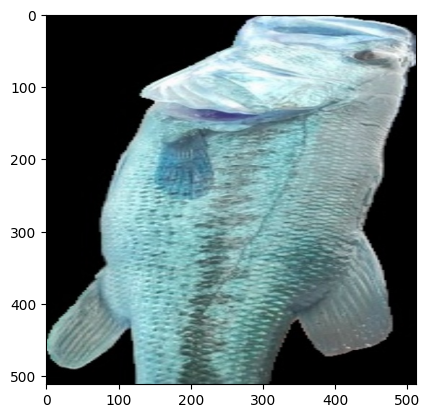

bass_full_100_mask.jpeg


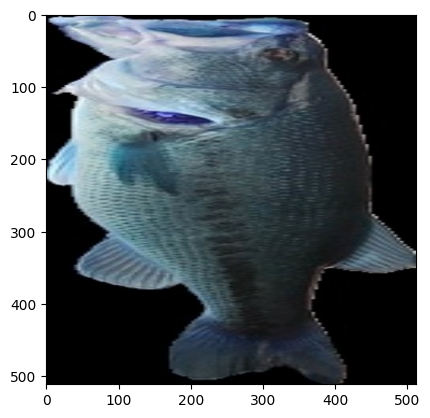

bass_full_1_mask.jpeg


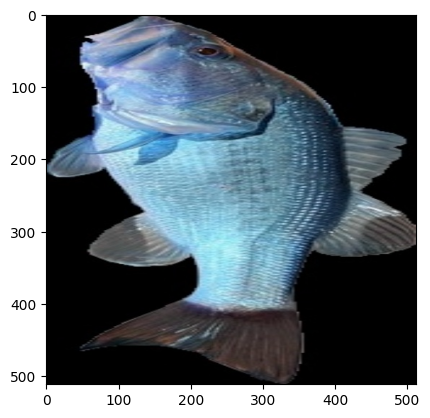

bass_full_20_mask.jpeg


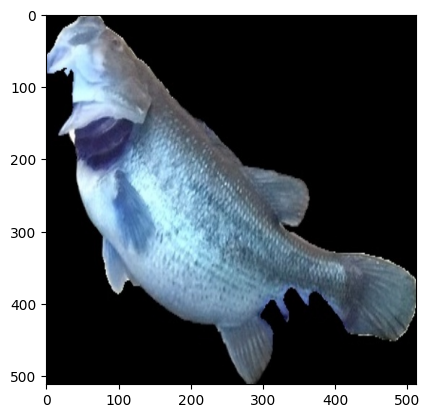

bass_full_11_mask.jpeg


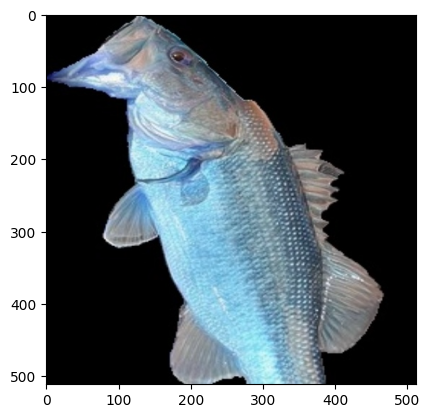

bass_full_18_mask.jpeg


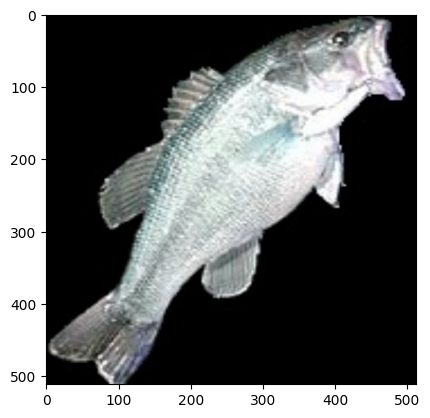

bass_full_2_mask.jpeg


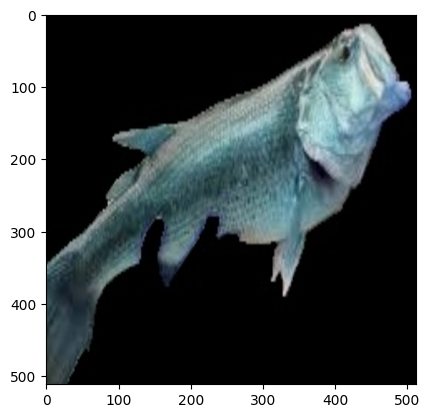

bass_full_14_mask.jpeg


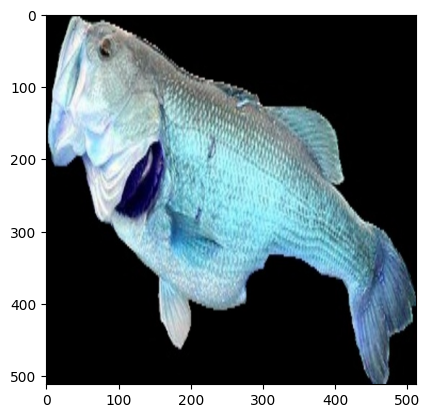

bass_full_16_mask.jpeg


KeyboardInterrupt: 

In [ ]:
imgs = [f for f in os.listdir(SAVE_DIR) if os.path.isfile(os.path.join(SAVE_DIR, f))]
for fish in imgs:
    img = cv2.imread(SAVE_DIR + fish)
    imshow(img)
    show()
    print(fish)


In [ ]:
#### PLEASE CHECK BEFORE YOU RUN THIS CODE

# Code to delete all the images in a folder in case you messed up
raise ValueError("Make sure you really want to run this code, mainly used in testing")

delete_path = SAVE_DIR

if os.listdir(delete_path):
  for img_path in os.listdir(delete_path):
    os.remove(delete_path + img_path)
    print(delete_path + img_path + ' has been deleted' )
else:
  print("Folder is empty already")

In [ ]:
# Code to delete a certain augmented set of images in a folder in case you messed up
#### PLEASE CHECK BEFORE YOU RUN THIS CODE

# Code to delete all the images in a folder in case you messed up
raise ValueError("Make sure you really want to run this code, mainly used in testing")

delete_path = SAVE_DIR
img_name = 'test'
if os.listdir(delete_path):
  for img_path in os.listdir(delete_path):
    if (img_name + '_aug_') in img_path:
      os.remove(delete_path + img_path)
      print(delete_path + img_path + ' has been deleted' )
else:
  print("Folder is empty already")